In [ ]:
!pip install --upgrade mxnet gluoncv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_path = "/content/drive/My Drive/ml/edyo/project"

In [ ]:
import gluoncv as gcv
import mxnet as mx

from gluoncv.data.transforms.presets.yolo import transform_test

import cv2
import numpy as np

import time
import os

Trained model on automatically labeled hands dataset (https://sites.google.com/view/11khands):

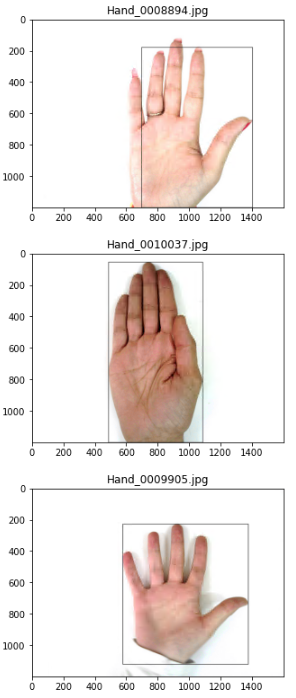

In [ ]:
classes = ["raised_hand"]
ctx = [mx.cpu()]
model_path = f"{project_path}/data/yolo3_darknet53_custom_0096_0.6456.params"
net = gcv.model_zoo.get_model('yolo3_darknet53_custom', classes=classes, pretrained=model_path, ctx=ctx)
net.load_parameters(model_path, ctx=ctx)
net.hybridize()

In [18]:
def process_video(video_path, output_folder, skip_frames=10):
    video_name = os.path.basename(video_path)

    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    i = 0

    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    h, w = frame.shape[:2]

    out = cv2.VideoWriter(f'{output_folder}/hands_mxnet_{video_name}', fourcc, fps, (w, h))

    process_time = 0
    
    while(ret):
        frame = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).astype('uint8')
        rgb_nd, frame = transform_test(frame, short=512, max_size=700)
        if i==0 or i%skip_frames==0:
            start_time = time.time()
            class_ids, scores, bboxes = net(rgb_nd)
            process_time += time.time() - start_time
        
        output_frame = gcv.utils.viz.cv_plot_bbox(frame, bboxes[0], scores[0], class_ids[0], class_names=net.classes)
        output_frame = cv2.resize(output_frame, (w, h))[:,:,::-1]
        out.write(output_frame)
        ret, frame = cap.read()
        i += 1

    cap.release()
    out.release()

In [19]:
process_video(f"{project_path}/dataset/gans_test_hands.MOV", f"{project_path}/output/raised_hand")

In [ ]:
video_list = ["video_1_0000.mp4", "video_2_0000.mp4", "video_3_0001.mp4", "video_3_0045.mp4", "video_4_0001.mp4"]

for video_name in video_list:
    process_video(f"{project_path}/dataset/video/medium/{video_name}", f"{project_path}/output/raised_hand", 25)